In [1]:
import os
import sys
import pandas as pd 

sys.path.append("..")

DATA = os.path.normpath("../data/")

def load_data(name):
    path = os.path.join(DATA, name, name + ".csv")
    return pd.read_csv(path)

In [2]:
data = load_data("occupancy")

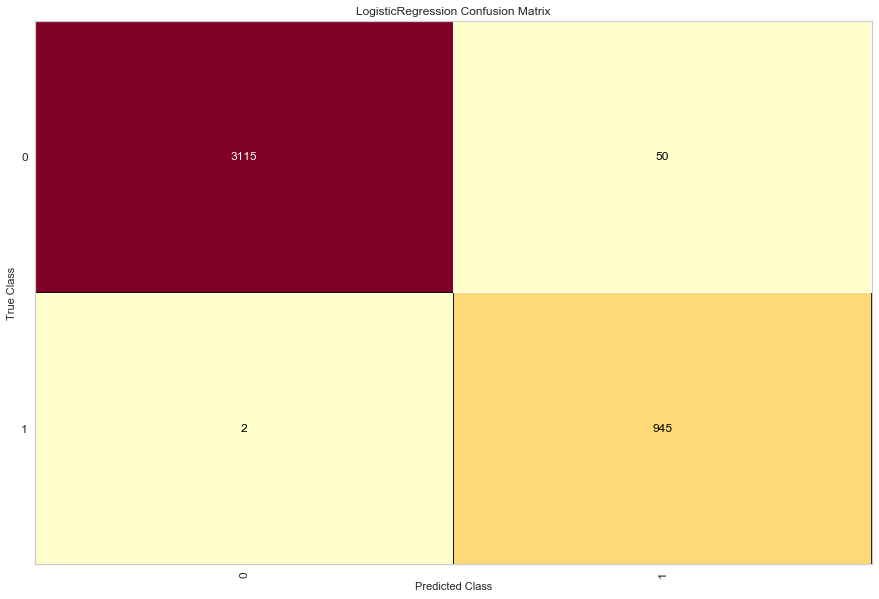

In [4]:
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

features = ["temperature", "relative humidity", "light", "C02", "humidity"]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

oz = ConfusionMatrix(LogisticRegression(), size=(1080, 720))

oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()